In [1]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from urllib.parse import quote_plus

In [14]:
# load environment
load_dotenv()
# export env

src_host = os.getenv('SRC_HOST')
src_port = os.getenv('SRC_PORT')
src_dbname = os.getenv('SRC_DBNAME')
src_user = os.getenv('SRC_USER')
src_password = os.getenv('SRC_PASSWORD')
encode_src_password = quote_plus(src_password)
src_table = os.getenv('SRC_TABLE')

In [15]:
# test connect to redshift

try:
    conn = psycopg2.connect(
        dbname   = src_dbname,
        user     = src_user,
        password = src_password,
        host     = src_host,
        port     = src_port
    )
    
    # 
    cur = conn.cursor()
    cur.execute("SELECT version();")

    # Fetch and print the result of the query
    version = cur.fetchone()
    print(f"Connected to Redshift. Server version: {version}")

    # Close the cursor and connection
    cur.close()
    conn.close()

except Exception as e:
    print(f"Failed to connect to Redshift: {e}")

Connected to Redshift. Server version: ('PostgreSQL 8.0.2 on i686-pc-linux-gnu, compiled by GCC gcc (GCC) 3.4.2 20041017 (Red Hat 3.4.2-6.fc3), Redshift 1.0.70665',)


## transforming

In [16]:
redshift_url = f"redshift+psycopg2://{src_user}:{encode_src_password}@{src_host}:{src_port}/{src_dbname}?sslmode=disable"

In [17]:
engine = create_engine(redshift_url)
query = f"SELECT * FROM {src_table};"

# use this for pandas > 2.20
with engine.connect() as conn:
    df = pd.read_sql(
        sql=query,
        con=conn.connection
    )

/tmp/ipykernel_75797/1856397194.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


In [11]:
#to shows all features
pd.set_option('display.max_columns',None)

In [18]:
df.shape

(32833, 21)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_name           32833 non-null  object 
 1   track_artist         32833 non-null  object 
 2   track_popularity     32833 non-null  int64  
 3   track_album_name     32833 non-null  object 
 4   playlist_name        32833 non-null  object 
 5   playlist_genre       32833 non-null  object 
 6   playlist_subgenre    32833 non-null  object 
 7   danceability         32833 non-null  object 
 8   energy               32833 non-null  object 
 9   key                  32833 non-null  object 
 10  loudness             32833 non-null  object 
 11  mode                 32833 non-null  object 
 12  speechiness          32833 non-null  float64
 13  acousticness         32833 non-null  float64
 14  instrumentalness     32833 non-null  float64
 15  liveness             32833 non-null 

In [19]:
df.head()

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,Dance with Me,Orleans,55,Dance With Me: The Best Of Orleans,Soft Rock Drive,rock,classic rock,0.565,0.392,2,-10.083,1,0.0268,0.551,0.000106,0.2470,0.493,98.485,180480.0,1997,6.0
1,Your Smiling Face,James Taylor,60,JT,Soft Rock Drive,rock,classic rock,0.683,0.515,1,-10.932,1,0.0592,0.137,0.000007,0.0816,0.767,88.827,165400.0,1977,1.0
2,Reminiscing - Remastered,Little River Band,62,Sleeper Catcher (Remastered),Soft Rock Drive,rock,classic rock,0.54,0.465,7,-11.259,1,0.0302,0.652,0.005440,0.1320,0.341,94.731,253080.0,1978,1.0
3,Just the Way You Are,Billy Joel,68,The Stranger (Legacy Edition),Soft Rock Drive,rock,classic rock,0.589,0.453,7,-8.912,1,0.0397,0.703,0.000025,0.1340,0.513,139.148,290573.0,1977,1.0
4,Sara Smile,Daryl Hall & John Oates,65,Daryl Hall & John Oates,Soft Rock Drive,rock,classic rock,0.592,0.397,2,-10.81,0,0.0676,0.354,0.000894,0.1190,0.205,150.038,185293.0,1975,1.0


## check if there any nulls data

In [99]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
             })

,count,nulls,nulls%,cardinality
track_name,32833,0,0.000000,23450
track_artist,32833,0,0.000000,10693
track_popularity,32833,0,0.000000,101
track_album_name,32833,0,0.000000,19744
playlist_name,32833,0,0.000000,450
playlist_genre,32833,0,0.000000,14
playlist_subgenre,32833,0,0.000000,27
danceability,32833,0,0.000000,823
energy,32833,0,0.000000,953
key,32833,0,0.000000,23


In [157]:
# check if there any missing values 
cleaned_df.isna().sum().sort_values(ascending=False)

track_name             0
track_artist           0
track_popularity       0
track_album_name       0
playlist_name          0
playlist_genre         0
playlist_subgenre      0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
album_release_year     0
album_release_month    0
dtype: int64

In [166]:
missing_rows = df[df[['track_name', 'track_artist', 'track_album_name']].isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [track_name, track_artist, track_popularity, track_album_name, playlist_name, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, album_release_year, album_release_month]
Index: []


In [161]:
cleaned_df[cleaned_df['track_name'].isna()==True]

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month


In [162]:
cleaned_df[cleaned_df['track_artist'].isna()==True]

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month


In [163]:
cleaned_df[cleaned_df['track_artist'].isna()==True]

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month


In [155]:
cleaned_df = df.dropna()
cleaned_df.head()

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,Never Give Up,Sia,67,Never Give Up (From Lion Soundtrack),Electropop Hits 2017-2020,Pop,Electropop,0.568,0.936,6,-2.961,0,0.0530,0.00497,0.013800,0.1200,0.605,91.009,221987.0,2016,11.0
1,Love You Like A Love Song,Selena Gomez & The Scene,9,For You,Electropop Hits 2017-2020,Pop,Electropop,0.856,0.674,1,-3.793,0,0.0513,0.06380,0.000000,0.0726,0.874,116.991,188453.0,2014,11.0
2,I Want You To Know,Zedd,7,True Colors,Electropop Hits 2017-2020,Pop,Electropop,0.58,0.846,9,-2.876,0,0.0573,0.00537,0.000007,0.1450,0.366,129.998,239999.0,2015,5.0
3,Price Tag,Jessie J,70,Who You Are (Platinum Edition),Electropop Hits 2017-2020,Pop,Electropop,0.636,0.832,5,-3.944,1,0.1790,0.02930,0.000004,0.2720,0.677,175.015,223053.0,2011,1.0
4,First Time,Kygo,69,First Time,Electropop Hits 2017-2020,Pop,Electropop,0.633,0.592,0,-7.245,0,0.1120,0.19700,0.000000,0.0990,0.679,90.066,193511.0,2017,4.0


In [156]:
cleaned_df.isna().any().sum()

np.int64(0)

In [111]:
cleaned_df.describe()

,track_popularity,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
count,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000
mean,42.485573,0.107052,0.175319,0.084741,0.190208,0.510559,120.872798,225763.932239,2011.135645,6.143902
std,24.980254,0.101263,0.219641,0.224242,0.154336,0.233138,26.899805,59792.123424,11.419191,3.832410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000,1.000000
25%,24.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187806.000000,2008.000000,2.000000
50%,45.000000,0.062500,0.080300,0.000016,0.127000,0.512000,121.982000,216000.000000,2016.000000,6.000000
75%,62.000000,0.132000,0.255000,0.004820,0.248000,0.693000,133.907000,253533.000000,2019.000000,10.000000
max,100.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000,12.000000


## Check Unique Values and Data Types

In [120]:
cleaned_df.nunique()

track_name             23447
track_artist           10692
track_popularity         101
track_album_name       19742
playlist_name            448
playlist_genre             6
playlist_subgenre         24
danceability             822
energy                   952
key                       12
loudness               10217
mode                       2
speechiness             1270
acousticness            3731
instrumentalness        4727
liveness                1624
valence                 1362
tempo                  17678
duration_ms            19779
album_release_year        63
album_release_month       12
dtype: int64

In [122]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32821 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_name           32821 non-null  object 
 1   track_artist         32821 non-null  object 
 2   track_popularity     32821 non-null  int64  
 3   track_album_name     32821 non-null  object 
 4   playlist_name        32821 non-null  object 
 5   playlist_genre       32821 non-null  object 
 6   playlist_subgenre    32821 non-null  object 
 7   danceability         32821 non-null  object 
 8   energy               32821 non-null  object 
 9   key                  32821 non-null  object 
 10  loudness             32821 non-null  object 
 11  mode                 32821 non-null  object 
 12  speechiness          32821 non-null  float64
 13  acousticness         32821 non-null  float64
 14  instrumentalness     32821 non-null  float64
 15  liveness             32821 non-null  floa

In [125]:
# change data types that are supposed to be

# float64
cleaned_df['danceability']= cleaned_df['danceability'].astype('float64')
cleaned_df['energy']= cleaned_df['energy'].astype('float64')
cleaned_df['loudness']= cleaned_df['loudness'].astype('float64')

#int64
cleaned_df['key']= cleaned_df['key'].astype('int64')
cleaned_df['mode']= cleaned_df['mode'].astype('int64')
cleaned_df['album_release_month']= cleaned_df['album_release_month'].astype('int64')

/tmp/ipykernel_44304/2127428404.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_44304/2127428404.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_44304/2127428404.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4

In [126]:
# recheck after changes
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32821 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_name           32821 non-null  object 
 1   track_artist         32821 non-null  object 
 2   track_popularity     32821 non-null  int64  
 3   track_album_name     32821 non-null  object 
 4   playlist_name        32821 non-null  object 
 5   playlist_genre       32821 non-null  object 
 6   playlist_subgenre    32821 non-null  object 
 7   danceability         32821 non-null  float64
 8   energy               32821 non-null  float64
 9   key                  32821 non-null  int64  
 10  loudness             32821 non-null  float64
 11  mode                 32821 non-null  int64  
 12  speechiness          32821 non-null  float64
 13  acousticness         32821 non-null  float64
 14  instrumentalness     32821 non-null  float64
 15  liveness             32821 non-null  floa

In [129]:
cleaned_df.head()

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,Never Give Up,Sia,67,Never Give Up (From Lion Soundtrack),Electropop Hits 2017-2020,Pop,Electropop,0.568,0.936,6,-2.961,0,0.0530,0.00497,0.013800,0.1200,0.605,91.009,221987.0,2016,11
1,Love You Like A Love Song,Selena Gomez & The Scene,9,For You,Electropop Hits 2017-2020,Pop,Electropop,0.856,0.674,1,-3.793,0,0.0513,0.06380,0.000000,0.0726,0.874,116.991,188453.0,2014,11
2,I Want You To Know,Zedd,7,True Colors,Electropop Hits 2017-2020,Pop,Electropop,0.580,0.846,9,-2.876,0,0.0573,0.00537,0.000007,0.1450,0.366,129.998,239999.0,2015,5
3,Price Tag,Jessie J,70,Who You Are (Platinum Edition),Electropop Hits 2017-2020,Pop,Electropop,0.636,0.832,5,-3.944,1,0.1790,0.02930,0.000004,0.2720,0.677,175.015,223053.0,2011,1
4,First Time,Kygo,69,First Time,Electropop Hits 2017-2020,Pop,Electropop,0.633,0.592,0,-7.245,0,0.1120,0.19700,0.000000,0.0990,0.679,90.066,193511.0,2017,4


##

In [130]:
# stats
cleaned_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
count,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000
mean,42.485573,0.654841,0.698729,5.375461,-6.717942,0.565644,0.107052,0.175319,0.084741,0.190208,0.510559,120.872798,225763.932239,2011.135645,6.143902
std,24.980254,0.145081,0.180847,3.611699,2.987751,0.495680,0.101263,0.219641,0.224242,0.154336,0.233138,26.899805,59792.123424,11.419191,3.832410
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000,1.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.169000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187806.000000,2008.000000,2.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.165000,1.000000,0.062500,0.080300,0.000016,0.127000,0.512000,121.982000,216000.000000,2016.000000,6.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004820,0.248000,0.693000,133.907000,253533.000000,2019.000000,10.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000,12.000000


## viz for checking data 

In [184]:
# top 10 artist
top_artists = cleaned_df['track_artist'].value_counts()[:10]
print(top_artists)

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


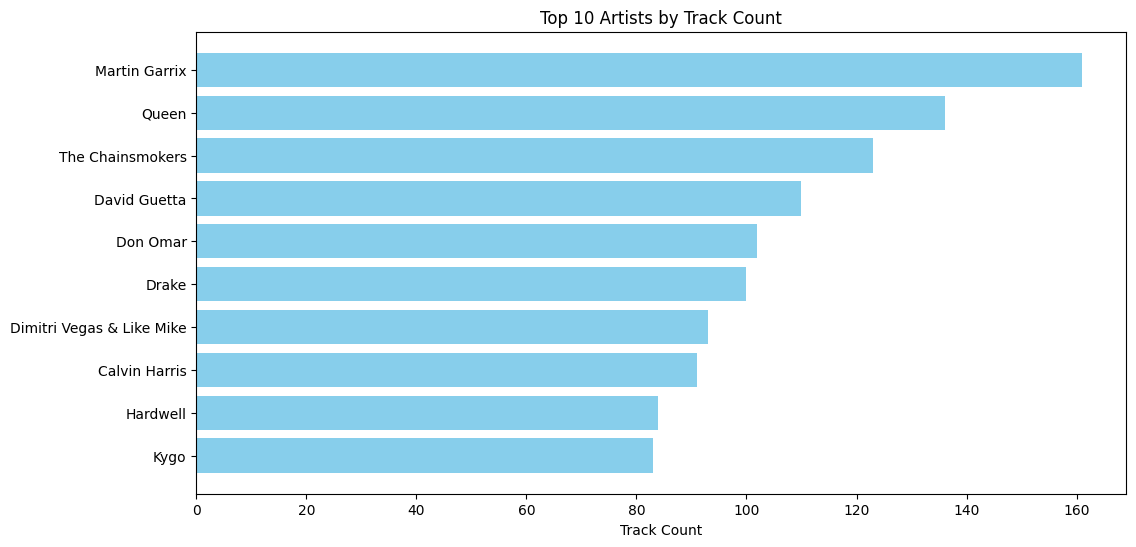

In [185]:
# Extract artist names and counts
artists = top_artists.index.tolist()
counts = top_artists.values.tolist()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(artists, counts, color='skyblue')
plt.xlabel('Track Count')
plt.title('Top 10 Artists by Track Count')
plt.gca().invert_yaxis()
plt.show()

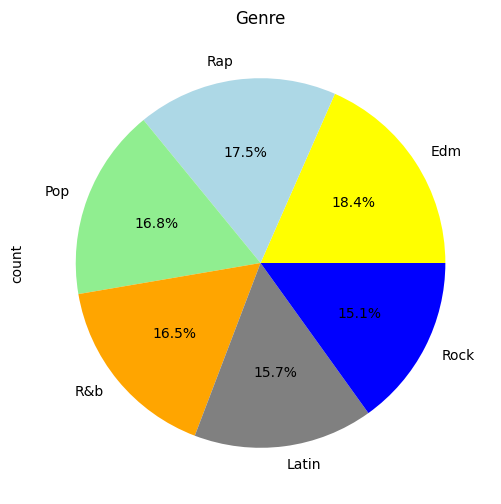

In [136]:
# Define custom colors for the slices
custom_colors = ['yellow', 'lightblue', 'lightgreen', 'orange', 'grey','blue',]
paper = plt.figure(figsize=[10,6])
cleaned_df['playlist_genre'].value_counts().plot.pie(autopct='%3.1f%%',colors=custom_colors)
plt.title('Genre')
plt.show()

In [138]:
cleaned_df['playlist_subgenre'].value_counts()

playlist_subgenre
Progressive electro house    1808
Southern hip hop             1675
Indie poptimism              1671
Latin hip hop                1656
Neo soul                     1632
Pop edm                      1517
Electro house                1511
Hard rock                    1485
Gangster rap                 1458
Electropop                   1408
Urban contemporary           1401
Hip hop                      1322
Dance pop                    1298
Classic rock                 1296
Trap                         1291
Tropical                     1288
Latin pop                    1262
Hip pop                      1255
Big room                     1206
New jack swing               1133
Post-teen pop                1129
Permanent wave               1105
Album rock                   1065
Reggaeton                     949
Name: count, dtype: int64

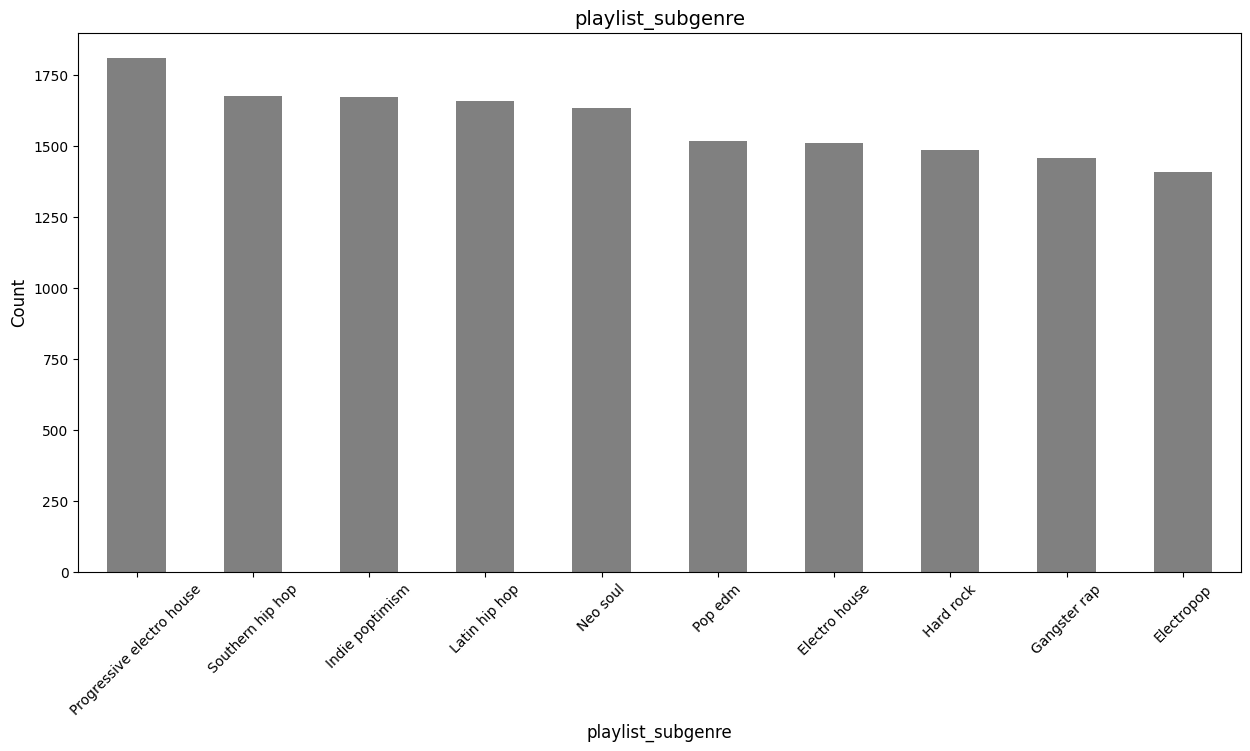

In [141]:
paper = plt.figure(figsize=(15,7))
cleaned_df['playlist_subgenre'].value_counts()[:10].plot.bar(color='grey')
plt.title('playlist_subgenre',size=14)
plt.xlabel('playlist_subgenre',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=45)
plt.show()

In [144]:
cleaned_df['album_release_year'].value_counts()

album_release_year
2019    9081
2018    3312
2017    2430
2016    2116
2015    1779
        ... 
1960       4
1962       2
1957       2
1958       1
1961       1
Name: count, Length: 63, dtype: int64

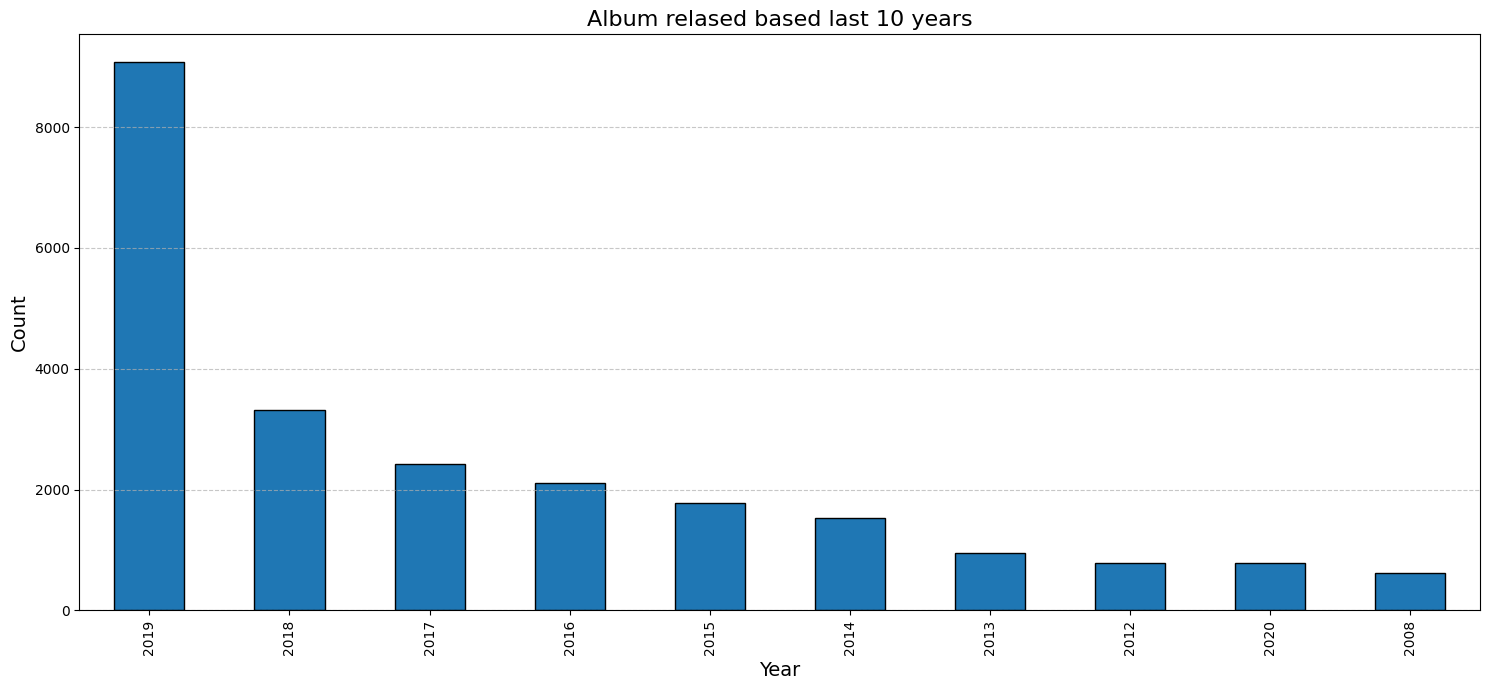

In [149]:
paper = plt.figure(figsize=(15,7))
cleaned_df['album_release_year'].value_counts()[:10].sort_values(ascending=False).plot.bar(edgecolor='black')
plt.xlabel('Year',size=14)
plt.ylabel('Count',size=14)
plt.title('Album relased based last 10 years',size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [150]:
cleaned_df['album_release_month'].value_counts().sort_index()

album_release_month
1     6948
2     1618
3     2014
4     1904
5     2213
6     2390
7     2010
8     2299
9     2543
10    3086
11    3359
12    2437
Name: count, dtype: int64

In [152]:
genre_avg_energy = cleaned_df.groupby(by='playlist_genre')[''].mean().sort_values(ascending=False)
genre_avg_energy

playlist_genre
Edm      0.802515
Rock     0.732813
Latin    0.708312
Pop      0.701076
Rap      0.650708
R&b      0.591324
Name: energy, dtype: float64

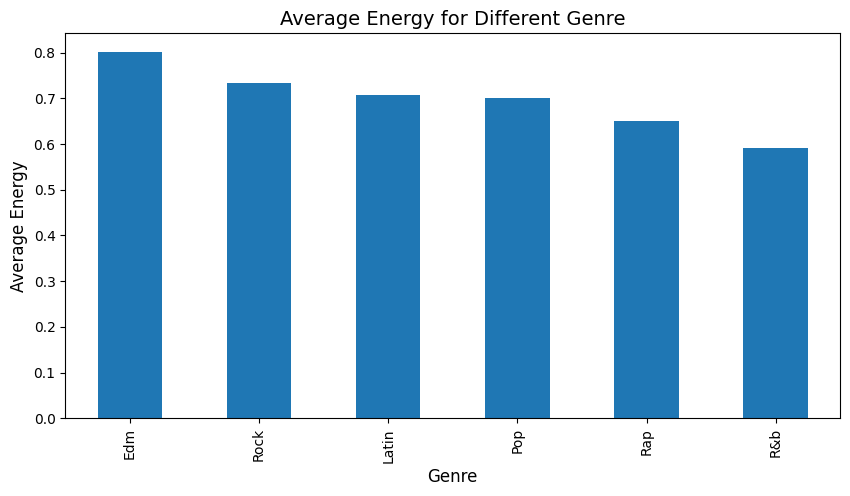

In [153]:
paper = plt.figure(figsize=(10,5))
genre_avg_energy.plot.bar()
plt.xlabel('Genre',size=12)
plt.ylabel('Average Energy',size=12)
plt.title('Average Energy for Different Genre',size=14)
plt.show()

In [183]:
# insert into new_table
# df_cleaned.to_sql('spotify_song_transformed', engine, index=False, if_exists='append')

821